In [312]:
#numpyのインストール
import numpy as np
#pandasのインストール
import pandas as pd
#statistics
import statistics as st
#statsmodelsのインストール
import statsmodels.api as sm
#時系列モデルのインストール
from statsmodels.tsa import stattools as st
from statsmodels.tsa.seasonal import seasonal_decompose as sd
#scikit-learnのインストール
import sklearn.linear_model as lm
#msnoのインストール
import missingno as msno
#pyplotのインストール
import matplotlib.pyplot as plt
#seabornのインストール
import seaborn as sns
%matplotlib inline
sns.set()
lr = lm.LogisticRegression()

In [313]:
df = pd.read_csv('data3.csv')
df.shape
#195×19次元

(183, 19)

In [314]:
df.head(10)

,year,avg_temp,avg_temp1,avg_temp2,sun,sun1,sun2,sun3,avg_wind,avg_wind1,avg_wind2,avg_cloud_quantity,avg_cloud_quantity1,avg_cloud_quantity2,rain_sum,rain_sum1,rain_sum2,rain_sum3,Year
0,2001/1/1,4.6,8,1,173.9,0,8,1,4.1,8,1,5.0,8,1,146.5,0,8,1,NaN
1,2001/2/1,6.2,8,1,146.9,0,8,1,3.6,8,1,6.1,8,1,38.5,0,8,1,NaN
2,2001/3/1,9.4,8,1,181.3,0,8,1,4.1,8,1,5.9,8,1,133.5,0,8,1,NaN
3,2001/4/1,15.0,8,1,226.6,0,8,1,3.9,8,1,5.6,8,1,64.0,0,8,1,NaN
4,2001/5/1,18.7,8,1,170.0,0,8,1,3.5,8,1,7.6,8,1,194.5,0,8,1,NaN
5,2001/6/1,22.2,8,1,114.5,0,8,1,3.0,8,1,8.8,8,1,141.0,0,8,1,NaN
6,2001/7/1,27.4,8,1,275.5,0,8,1,3.9,8,1,5.9,8,1,46.5,0,8,1,NaN
7,2001/8/1,25.8,8,1,132.8,0,8,1,2.8,8,1,8.4,8,1,162.5,0,8,1,NaN
8,2001/9/1,22.6,8,1,119.0,0,8,1,3.2,8,1,7.6,8,1,215.5,0,8,1,NaN
9,2001/10/1,18.1,8,1,149.4,0,8,1,3.3,8,1,6.4,8,1,306.5,0,8,1,NaN


In [340]:
#原系列
w_data = df.loc[:,['year','avg_temp','sun','avg_wind','rain_sum','avg_cloud_quantity']].set_index('year')

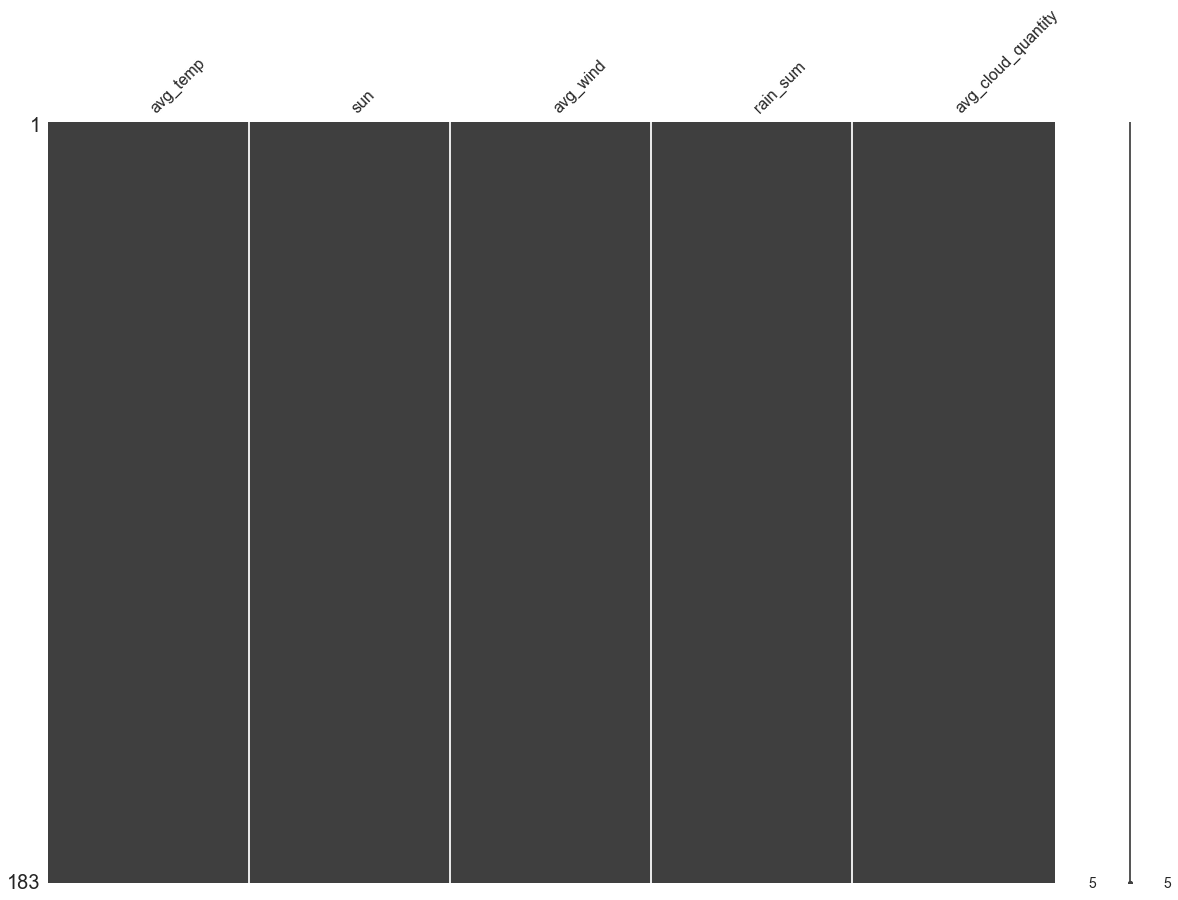

In [316]:
#データ欠損の確認 (欠損なし！)
msno.matrix(df=w_data,figsize=(20,14))

In [317]:
#原系列に対するADF検定
print (st.adfuller(w_data['avg_temp'].values.ravel()))
print (st.adfuller(w_data['sun'].values.ravel()))
print (st.adfuller(w_data['avg_wind'].values.ravel()))
print (st.adfuller(w_data['rain_sum'].values.ravel()))
print (st.adfuller(w_data['avg_cloud_quantity'].values.ravel()))

(-3.0735916943566344, 0.028570257964309134, 13, 169, {'1%': -3.4696482639876569, '5%': -2.8787989063084951, '10%': -2.5759713094779593}, 534.12008400846628)
(-5.2513985918225723, 6.8985898729093187e-06, 5, 177, {'1%': -3.4678453197999071, '5%': -2.8780117454974392, '10%': -2.575551186759871}, 1712.5427137768888)
(-1.8484999334505661, 0.3566622868963647, 13, 169, {'1%': -3.4696482639876569, '5%': -2.8787989063084951, '10%': -2.5759713094779593}, 126.90509974133818)
(-7.7312180161651618, 1.1240642266026284e-11, 9, 173, {'1%': -3.4687256239864017, '5%': -2.8783961376954363, '10%': -2.5757563410070499}, 2025.9494995038413)
(-2.8809550966213782, 0.047607906346807269, 12, 170, {'1%': -3.4694134689599019, '5%': -2.8786964197028295, '10%': -2.5759166089965397}, 470.8925248952072)


# Since P-value is less than 0.01 , these vars are 単位根

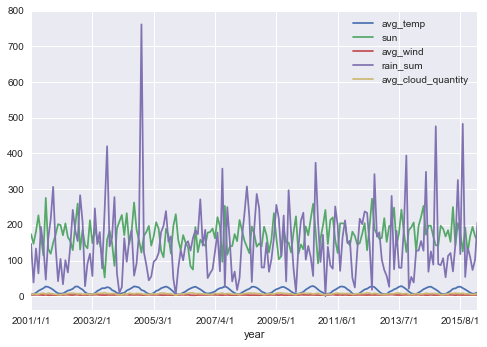

In [318]:
#原系列のplot
w_data.plot()

In [319]:
w_data.head()

,avg_temp,sun,avg_wind,rain_sum,avg_cloud_quantity
year,,,,,
2001/1/1,4.6,173.9,4.1,146.5,5.0
2001/2/1,6.2,146.9,3.6,38.5,6.1
2001/3/1,9.4,181.3,4.1,133.5,5.9
2001/4/1,15.0,226.6,3.9,64.0,5.6
2001/5/1,18.7,170.0,3.5,194.5,7.6


In [320]:
##各移動平均と差分系列を取得
#気温
temp_data = w_data.loc[:,['avg_temp']]
temp_moving_avg = temp_data.rolling(window=12).mean()
temp_diff = temp_data.diff().dropna()
#日差し
sun_data = w_data.loc[:,['sun']]
sun_moving_avg = sun_data.rolling(window=12).mean()
sun_diff = sun_data.diff().dropna()
#風量
wind_data = w_data.loc[:,['avg_wind']]
wind_moving_avg = wind_data.rolling(window=12).mean()
wind_diff = wind_data.diff().dropna()
#雨量
rain_data = w_data.loc[:,['rain_sum']]
rain_moving_avg = rain_data.rolling(window=12).mean()
rain_diff = rain_data.diff().dropna()
#雲量
cloud_data = w_data.loc[:,['avg_cloud_quantity']]
cloud_moving_avg = cloud_data.rolling(window=12).mean()
cloud_diff = cloud_data.diff().dropna()

In [321]:
temp_diff.head()

,avg_temp
year,
2001/2/1,1.6
2001/3/1,3.2
2001/4/1,5.6
2001/5/1,3.7
2001/6/1,3.5


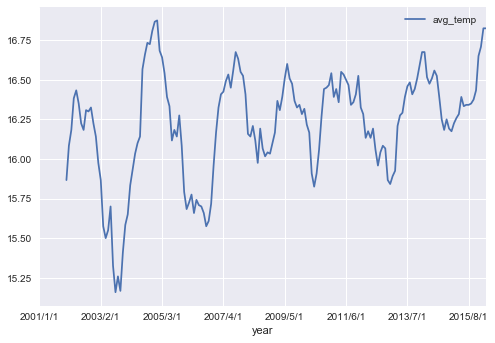

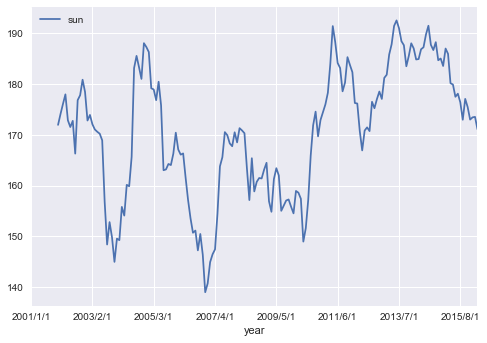

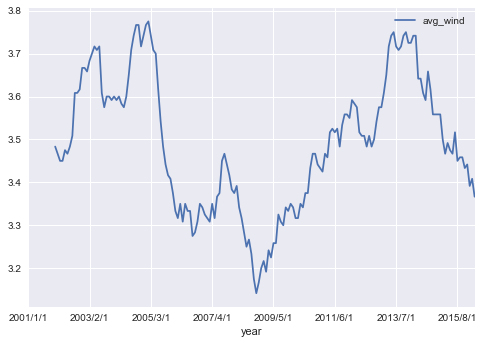

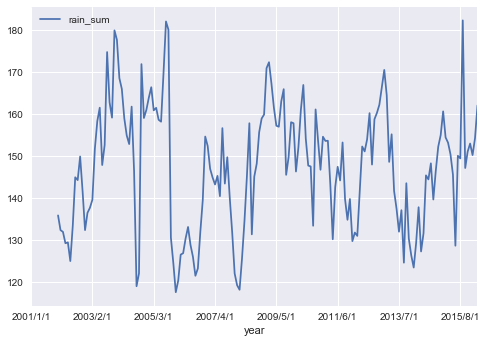

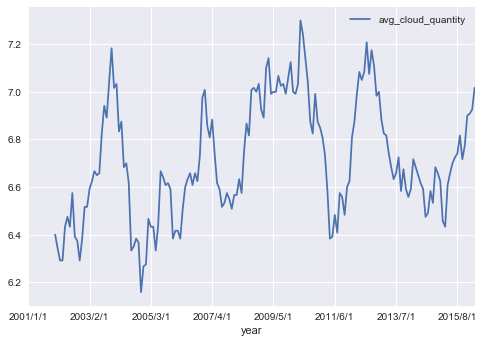

In [322]:
temp_moving_avg.plot()
sun_moving_avg.plot()
wind_moving_avg.plot()
rain_moving_avg.plot()
cloud_moving_avg.plot()

In [323]:
cloud_diff.head()

,avg_cloud_quantity
year,
2001/2/1,1.1
2001/3/1,-0.2
2001/4/1,-0.3
2001/5/1,2.0
2001/6/1,1.2


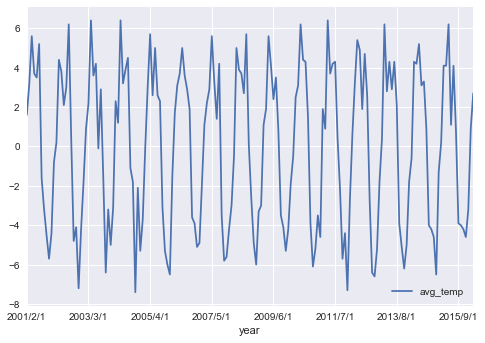

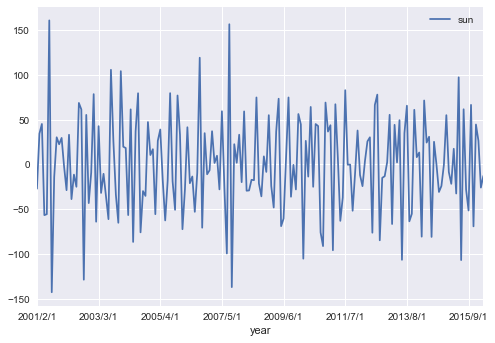

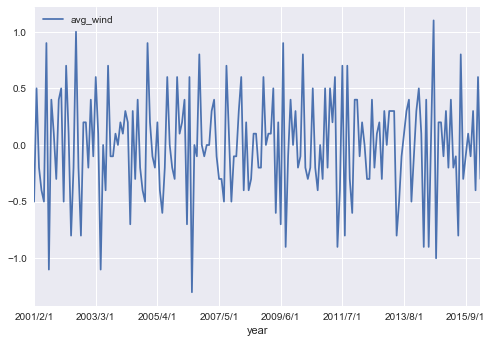

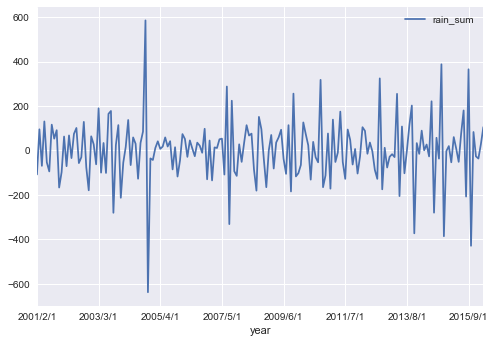

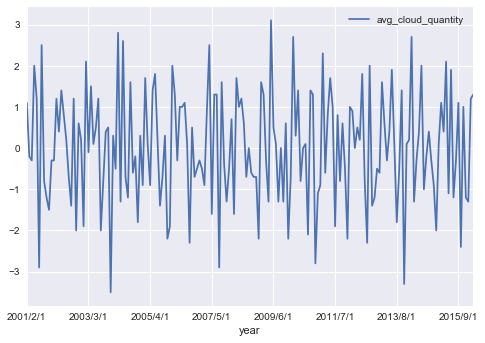

In [324]:
#差分系列のplot
temp_diff.plot()
sun_diff.plot()
wind_diff.plot()
rain_diff.plot()
cloud_diff.plot()

## 差分系列が定常過程なので、単位根過程として捉える

In [325]:
diff_data = pd.concat([temp_diff,sun_diff,wind_diff,rain_diff,cloud_diff],axis=1)

In [327]:
#差分系列をADF検定
print (st.adfuller(temp_diff['avg_temp'].values.ravel()))
print (st.adfuller(sun_diff['sun'].values.ravel()))
print (st.adfuller(wind_diff['avg_wind'].values.ravel()))
print (st.adfuller(rain_diff['rain_sum'].values.ravel()))
print (st.adfuller(cloud_diff['avg_cloud_quantity'].values.ravel()))

(-14.217605313252884, 1.6792483597318235e-26, 10, 171, {'1%': -3.4691814633722453, '5%': -2.8785951435329431, '10%': -2.5758625549741803}, 537.98163410378982)
(-6.8162777821349971, 2.0553151570578011e-09, 10, 171, {'1%': -3.4691814633722453, '5%': -2.8785951435329431, '10%': -2.5758625549741803}, 1713.5037981100934)
(-11.504052840492919, 4.4199252982985492e-21, 10, 171, {'1%': -3.4691814633722453, '5%': -2.8785951435329431, '10%': -2.5758625549741803}, 127.72384901353723)
(-9.0279897349845424, 5.5428649537218199e-15, 12, 169, {'1%': -3.4696482639876569, '5%': -2.8787989063084951, '10%': -2.5759713094779593}, 2034.2262543181309)
(-10.960150131270019, 8.3660338362667127e-20, 11, 170, {'1%': -3.4694134689599019, '5%': -2.8786964197028295, '10%': -2.5759166089965397}, 474.98732926883275)


# 単位根なので、差分系列同士で相関関係を確認する!

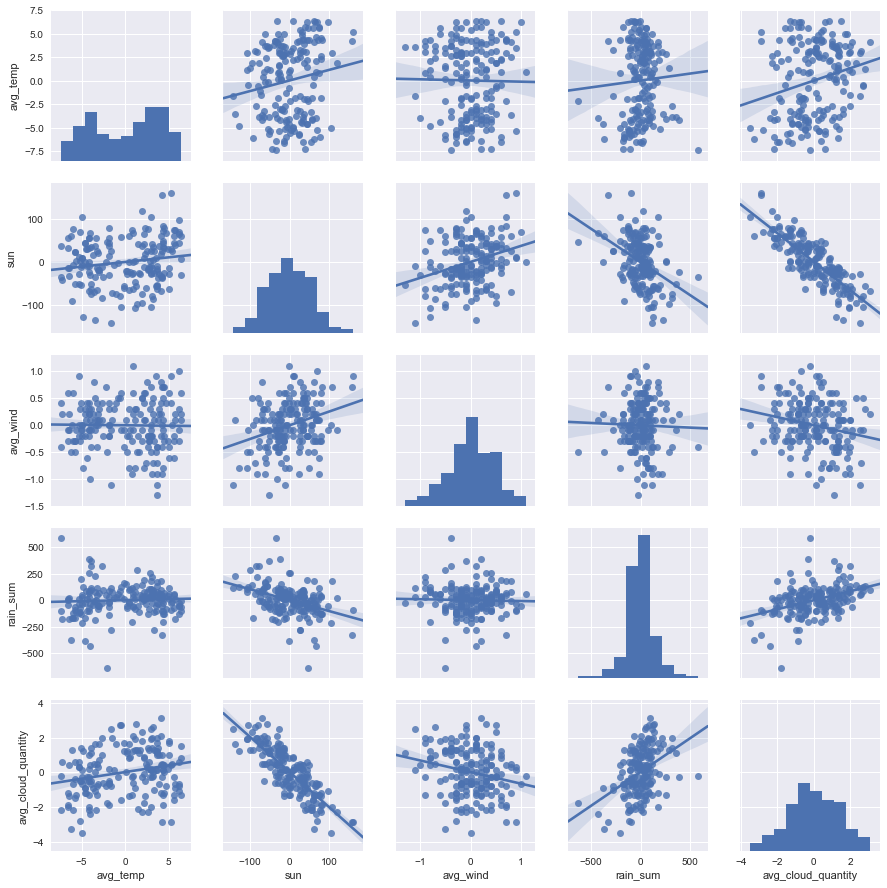

In [328]:
sns.pairplot(diff_data,kind='reg')

In [332]:
correlation_matrix = np.corrcoef(diff_data.transpose())

In [333]:
names = ['avg_temp','sun','avg_wind','rain_sum','cloud_quantity']

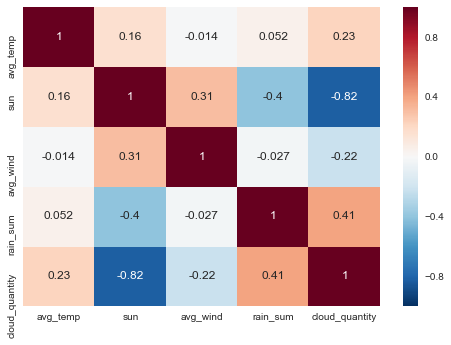

In [334]:
sns.heatmap(correlation_matrix, annot=True, xticklabels=names,yticklabels=names)

# Cloud quantityは日差しとか、気温とかとあまりにも相関するからバイバイする

In [341]:
w_data = w_data.drop(['avg_cloud_quantity'],axis=1)

In [342]:
diff_data = diff_data.drop(['avg_cloud_quantity'],axis=1)

# 横浜市のデータを読み込む！

In [343]:
econ = pd.read_excel('yokohamashi_data.xlsx',sheetname='all')

In [344]:
econ.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
世帯数分布(抽出率調整),277,278,275,282,284,282,283,285,289,292,294.00,296.00,297.00,300.00,305.00,306.00,306.00
集計世帯数,142,142,142,142,142,141,137,138,138,140,140.00,140.00,134.00,129.00,134.00,131.00,128.00
世帯人員(人),3.19,3.07,3.12,2.99,3.1,3.14,3.08,3.07,2.89,2.92,3.02,3.01,3.04,3.04,2.88,3.03,2.92
有業人員(人),1.37,1.33,1.33,1.34,1.3,1.26,1.26,1.25,1.22,1.22,1.30,1.22,1.18,1.26,1.12,1.26,1.07
世帯主の年齢(歳),53.3,53.6,55,53.8,54,52.9,54.4,56.4,58.4,56.4,56.40,55.40,58.50,58.10,58.50,59.10,61.20


In [345]:
econ = econ.T
econ.head()

,世帯数分布(抽出率調整),集計世帯数,世帯人員(人),有業人員(人),世帯主の年齢(歳),消費支出,食料,穀類,米,パン,...,仕送り金,(再掲) 教育関係費,(再掲) 教養娯楽関係費,(再掲) 移転支出(贈与金＋仕送り金),(再掲) 経常消費支出,(再掲) 情報通信関係費,(再掲) 消費支出(除く住居等) 2),現物総額,食料,エンゲル係数(％)
2000,277,142,3.19,1.37,53.3,356675,84656,8150,3426,2821,...,1637,21152,51058,14871,260084,…,…,9627,7292,23.7
2001,278,142,3.07,1.33,53.6,325637,77365,7404,3023,2569,...,3141,18107,46583,13732,248483,…,…,10346,7357,23.8
2002,275,142,3.12,1.33,55,321198,78858,7510,3209,2406,...,3922,20524,41524,15126,245254,…,…,8043,5784,24.6
2003,282,142,2.99,1.34,53.8,340914,78069,7511,3073,2515,...,2747,18969,43687,13240,254042,…,…,7594,5106,22.9
2004,284,142,3.1,1.3,54,353384,79350,7674,3257,2629,...,3614,25860,44041,19348,261893,…,…,9616,6583,22.5


In [346]:
econ = econ.reset_index(col_fill='year')
econ.head()

,index,世帯数分布(抽出率調整),集計世帯数,世帯人員(人),有業人員(人),世帯主の年齢(歳),消費支出,食料,穀類,米,...,仕送り金,(再掲) 教育関係費,(再掲) 教養娯楽関係費,(再掲) 移転支出(贈与金＋仕送り金),(再掲) 経常消費支出,(再掲) 情報通信関係費,(再掲) 消費支出(除く住居等) 2),現物総額,食料,エンゲル係数(％)
0,2000,277,142,3.19,1.37,53.3,356675,84656,8150,3426,...,1637,21152,51058,14871,260084,…,…,9627,7292,23.7
1,2001,278,142,3.07,1.33,53.6,325637,77365,7404,3023,...,3141,18107,46583,13732,248483,…,…,10346,7357,23.8
2,2002,275,142,3.12,1.33,55,321198,78858,7510,3209,...,3922,20524,41524,15126,245254,…,…,8043,5784,24.6
3,2003,282,142,2.99,1.34,53.8,340914,78069,7511,3073,...,2747,18969,43687,13240,254042,…,…,7594,5106,22.9
4,2004,284,142,3.1,1.3,54,353384,79350,7674,3257,...,3614,25860,44041,19348,261893,…,…,9616,6583,22.5


In [347]:
# データの中身
econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Columns: 137 entries, index to エンゲル係数(％)
dtypes: int64(1), object(136)
memory usage: 18.3+ KB


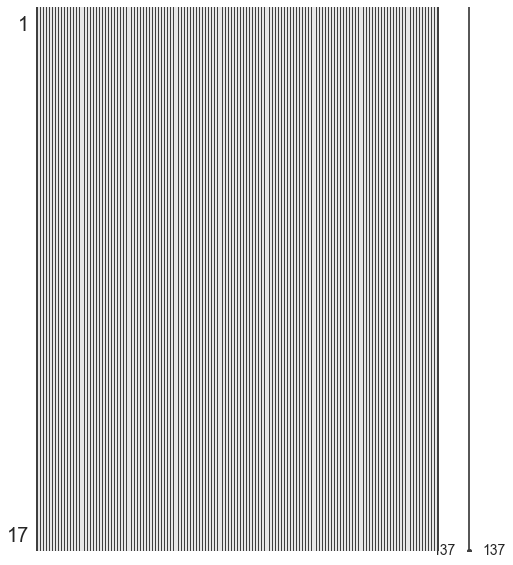

In [348]:
#欠損値確認
msno.matrix(df=econ,figsize=(8,10))

In [349]:
#消費支出の総額と各項目の
y_econ = econ.loc[:,['index','消費支出','食料','住居','光熱・水道','家具・家事用品','被服及び履物','保健医療','交通・通信','教育','教養娯楽','その他の消費支出','現物総額','エンゲル係数(％)']]

In [350]:
print (y_econ.dtypes)

index         int64
消費支出         object
食料           object
食料           object
食料           object
住居           object
光熱・水道        object
家具・家事用品      object
家具・家事用品      object
被服及び履物       object
被服及び履物       object
保健医療         object
交通・通信        object
教育           object
教養娯楽         object
教養娯楽         object
その他の消費支出     object
現物総額         object
エンゲル係数(％)    object
dtype: object


In [351]:
y_econ.astype(int)

,index,消費支出,食料,食料,食料,住居,光熱・水道,家具・家事用品,家具・家事用品,被服及び履物,被服及び履物,保健医療,交通・通信,教育,教養娯楽,教養娯楽,その他の消費支出,現物総額,エンゲル係数(％)
0,2000,356675,84656,7911,7292,22711,23082,12000,1142,16556,1036,13514,48107,18118,42644,2131,75288,9627,23
1,2001,325637,77365,7938,7357,24052,22001,10495,559,16821,958,11380,36618,15191,39148,1675,72565,10346,23
2,2002,321198,78858,6476,5784,23960,22051,10925,238,15668,970,12956,37993,15846,35745,1008,67196,8043,24
3,2003,340914,78069,7280,5106,25416,20791,11272,553,18277,1084,14293,44244,15961,35997,2211,76596,7594,22
4,2004,353384,79350,7337,6583,24643,21167,12929,577,15981,1176,14311,43288,20614,36188,1855,84914,9616,22
5,2005,332976,76423,5637,5141,22177,20878,10519,320,16871,691,15441,44808,19468,37811,1150,68581,7773,23
6,2006,323741,74692,6626,6061,27371,21823,9992,272,15350,781,15496,35856,18728,38035,1553,66398,9552,23
7,2007,324168,74061,6872,5201,19996,21034,9915,259,14624,772,15542,39249,19047,38753,1486,71947,7791,22
8,2008,311425,77329,6833,4490,17062,23075,11011,298,14910,744,12861,34798,13372,37796,1698,69210,6411,24
9,2009,316354,74817,6413,4975,15153,20374,9383,262,14597,719,15325,39425,17448,39570,1758,70262,7555,23


In [352]:
y_econ = y_econ.set_index('index')

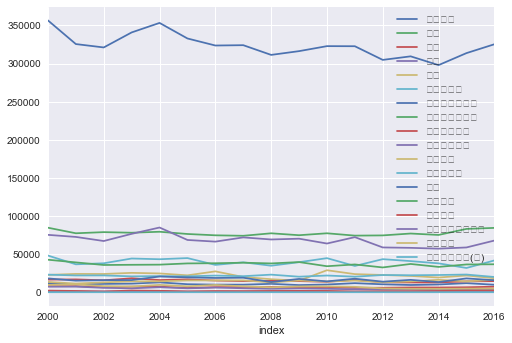

In [353]:
y_econ.plot()

In [354]:
#原系列に対するADF検定
print (st.adfuller(y_econ['消費支出'].values.ravel()))
print (st.adfuller(y_econ['食料'].values.ravel()))
print (st.adfuller(y_econ['住居'].values.ravel()))
print (st.adfuller(y_econ['光熱・水道'].values.ravel()))
print (st.adfuller(y_econ['家具・家事用品'].values.ravel()))
print (st.adfuller(y_econ['被服及び履物'].values.ravel()))
print (st.adfuller(y_econ['保健医療'].values.ravel()))
print (st.adfuller(y_econ['交通・通信'].values.ravel()))
print (st.adfuller(y_econ['教育'].values.ravel()))
print (st.adfuller(y_econ['教養娯楽'].values.ravel()))

(-0.0, 0.95853208606005602, 7, 9, {'1%': -4.4731350480109739, '5%': -3.2898806035665298, '10%': -2.7723823456790124}, -344.53274799954744)
(-2.839099189179476, 0.052902122346098861, 2, 48, {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}, 703.67220064861726)
(-0.0, 0.95853208606005602, 7, 9, {'1%': -4.4731350480109739, '5%': -3.2898806035665298, '10%': -2.7723823456790124}, -378.45929117999248)
(0.0, 0.95853208606005602, 8, 8, {'1%': -4.6651863281249994, '5%': -3.3671868750000002, '10%': -2.8029606249999999}, -384.97742440144617)
(-1.1244143876860857, 0.70523818913090541, 7, 26, {'1%': -3.7112123008648155, '5%': -2.9812468047337282, '10%': -2.6300945562130176}, 369.89934659663436)
(-1.950419469386643, 0.30872625178684232, 1, 32, {'1%': -3.653519805908203, '5%': -2.9572185644531253, '10%': -2.6175881640625001}, 379.83979904257598)
(0.0, 0.95853208606005602, 8, 8, {'1%': -4.6651863281249994, '5%': -3.3671868750000002, '10%': -2.8029606249999999}, -387.15

/Users/Taishi/anaconda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1148: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


# 圧倒的に単位根過程に従ってそう

In [397]:
##各移動平均と差分系列を取得
#消費
consumption_data = y_econ.loc[:,['消費支出']]
consumption_moving_avg = consumption_data.rolling(window=3).mean().dropna()
consumption_diff = consumption_data.diff().dropna().dropna()
#食料
food_data = y_econ.loc[:,['食料']]
food_moving_avg = food_data.rolling(window=3).mean().dropna()
food_diff = food_data.diff().dropna()
#住居
estate_data = y_econ.loc[:,['住居']]
estate_moving_avg = estate_data.rolling(window=3).mean().dropna()
estate_diff = estate_data.diff().dropna()
#光熱、水道
utility_data = y_econ.loc[:,['光熱・水道']]
utility_moving_avg = utility_data.rolling(window=3).mean().dropna()
utility_diff = utility_data.diff().dropna()
#家具・家事用品
furniture_data = y_econ.loc[:,['家具・家事用品']]
furniture_moving_avg = furniture_data.rolling(window=3).mean().dropna()
furniture_diff = furniture_data.diff().dropna()
#被服及び履物
cloth_data = y_econ.loc[:,['被服及び履物']]
cloth_moving_avg = cloth_data.rolling(window=3).mean().dropna()
cloth_diff = cloth_data.diff().dropna()
#保健医療
medical_data = y_econ.loc[:,['保健医療']]
medical_moving_avg = medical_data.rolling(window=3).mean().dropna()
medical_diff = medical_data.diff().dropna()
#風量
com_data = y_econ.loc[:,['交通・通信']]
com_moving_avg = com_data.rolling(window=3).mean().dropna()
com_diff = com_data.diff().dropna()
#教育
edu_data = y_econ.loc[:,['教育']]
edu_moving_avg = edu_data.rolling(window=3).mean().dropna()
edu_diff = edu_data.diff().dropna()
#雲量
edu_fun_data = y_econ.loc[:,['教養娯楽']]
edu_fun_moving_avg = edu_fun_data.rolling(window=3).mean().dropna()
edu_fun_diff = edu_fun_data.diff().dropna()

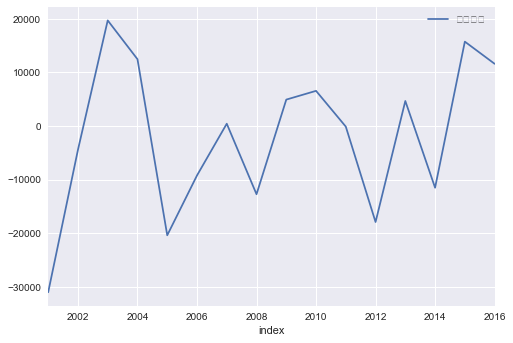

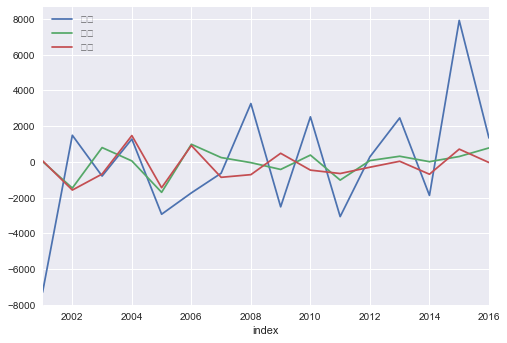

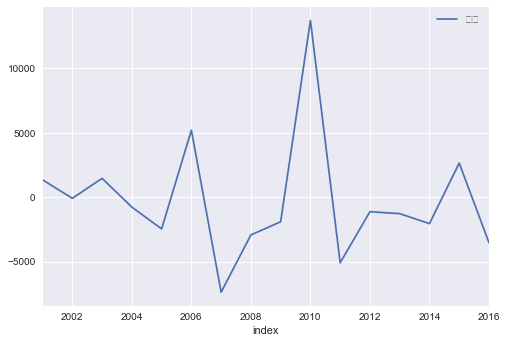

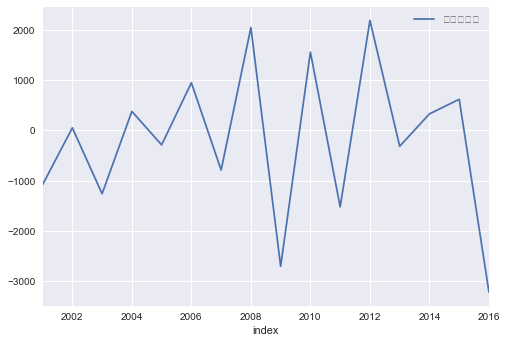

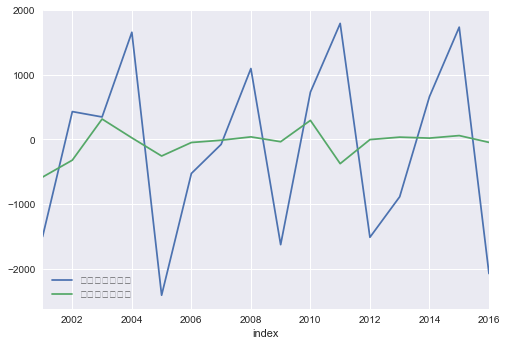

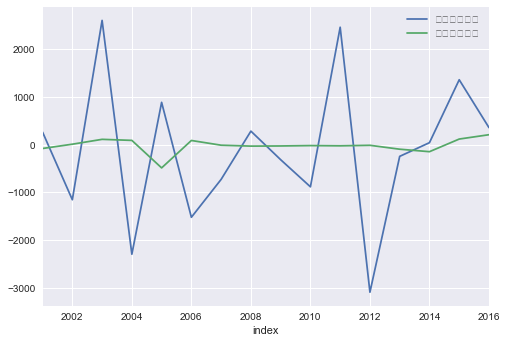

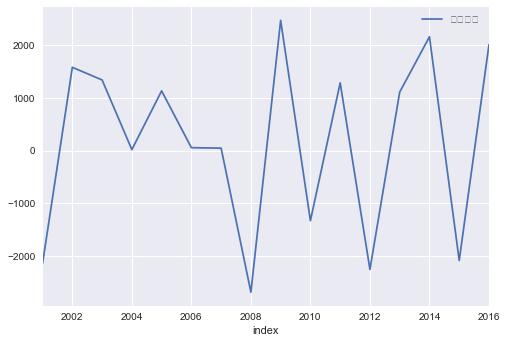

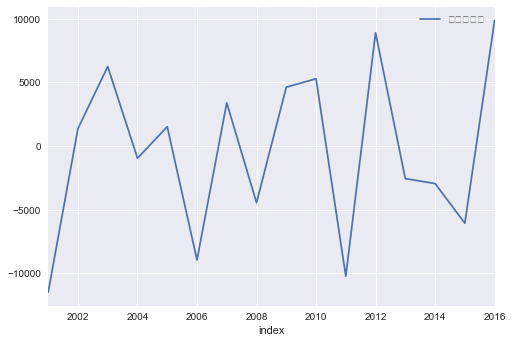

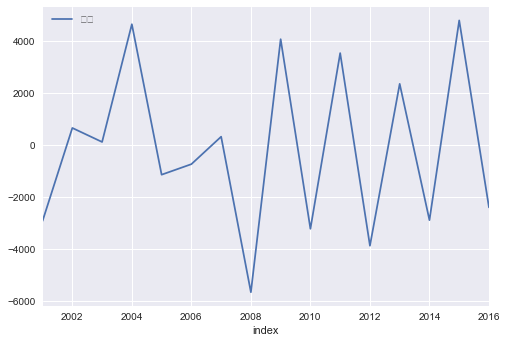

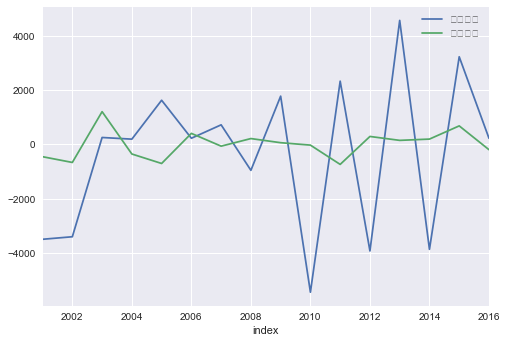

In [398]:
#差分
consumption_diff.plot()
food_diff.plot()
estate_diff.plot()
utility_diff.plot()
furniture_diff.plot()
cloth_diff.plot()
medical_diff.plot()
com_diff.plot()
edu_diff.plot()
edu_fun_diff.plot()

In [399]:
econ_diff = pd.concat([consumption_diff,food_diff,estate_diff,utility_diff,furniture_diff,cloth_diff,medical_diff,com_diff,edu_diff,edu_fun_diff],axis=1)

In [400]:
print (econ_diff.count())
print (econ_diff.head())

消費支出       16
食料         16
食料         16
食料         16
住居         16
光熱・水道      16
家具・家事用品    16
家具・家事用品    16
被服及び履物     16
被服及び履物     16
保健医療       16
交通・通信      16
教育         16
教養娯楽       16
教養娯楽       16
dtype: int64
         消費支出     食料     食料     食料     住居  光熱・水道 家具・家事用品 家具・家事用品 被服及び履物  \
index                                                                     
2001   -31038  -7291     27     65   1341  -1081   -1505    -583    265   
2002    -4439   1493  -1462  -1573    -92     50     430    -321  -1153   
2003    19716   -789    804   -678   1456  -1260     347     315   2609   
2004    12470   1281     57   1477   -773    376    1657      24  -2296   
2005   -20408  -2927  -1700  -1442  -2466   -289   -2410    -257    890   

      被服及び履物   保健医療   交通・通信     教育   教養娯楽  教養娯楽  
index                                            
2001     -78  -2134  -11489  -2927  -3496  -456  
2002      12   1576    1375    655  -3403  -667  
2003     114   1337    6251    115    252  1203  
2

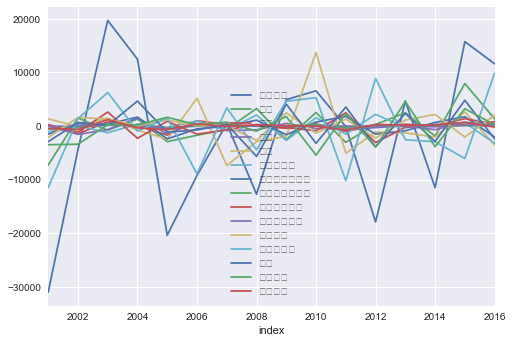

In [401]:
econ_diff.plot()

In [402]:
econ_diff.shape

(16, 15)

In [436]:
y_con = econ_diff.loc[:,['消費支出']]

# ここで消費支出のヒストグラムを見ます

In [439]:
fuck = y_con.reset_index()

In [440]:
fuck.head()

,index,消費支出
0,2001,-31038
1,2002,-4439
2,2003,19716
3,2004,12470
4,2005,-20408


In [448]:
fuck = fuck.loc[:,['消費支出']]

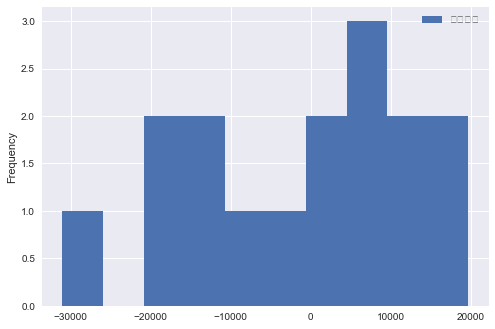

In [456]:
fuck.plot(kind='hist')

# うーんデータ量がすくないなぁ

# うまく書けなかった。。
num=2000
df = pd.DataFrame()

for i in range (15):
    df = df.append(pd.read_excel('yoko_econ.xlsx',sheetname=2016))
    num += 1

In [509]:
dat2000 = pd.read_excel('yoko_econ.xlsx',sheetname='2000').T.drop(['平均'],axis=0).reset_index()
dat2001 = pd.read_excel('yoko_econ.xlsx',sheetname='2001').T.drop(['平均'],axis=0).reset_index()
dat2002 = pd.read_excel('yoko_econ.xlsx',sheetname='2002').T.drop(['平均'],axis=0).reset_index()
dat2003 = pd.read_excel('yoko_econ.xlsx',sheetname='2003').T.drop(['平均'],axis=0).reset_index()
dat2004 = pd.read_excel('yoko_econ.xlsx',sheetname='2004').T.drop(['平均'],axis=0).reset_index()
dat2005 = pd.read_excel('yoko_econ.xlsx',sheetname='2005').T.drop(['平均'],axis=0).reset_index()
dat2006 = pd.read_excel('yoko_econ.xlsx',sheetname='2006').T.drop(['平均'],axis=0).reset_index()
dat2007 = pd.read_excel('yoko_econ.xlsx',sheetname='2007').T.drop(['平均'],axis=0).reset_index()
dat2008 = pd.read_excel('yoko_econ.xlsx',sheetname='2008').T.drop(['平均'],axis=0).reset_index()
dat2009 = pd.read_excel('yoko_econ.xlsx',sheetname='2009').T.drop(['平均'],axis=0).reset_index()
dat2010 = pd.read_excel('yoko_econ.xlsx',sheetname='2010').T.drop(['平均'],axis=0).reset_index()
dat2011 = pd.read_excel('yoko_econ.xlsx',sheetname='2011').T.drop(['平均'],axis=0).reset_index()
dat2012 = pd.read_excel('yoko_econ.xlsx',sheetname='2012').T.drop(['平均'],axis=0).reset_index()
dat2013 = pd.read_excel('yoko_econ.xlsx',sheetname='2013').T.drop(['平均'],axis=0).reset_index()
dat2014 = pd.read_excel('yoko_econ.xlsx',sheetname='2014').T.drop(['平均'],axis=0).reset_index()
dat2015 = pd.read_excel('yoko_econ.xlsx',sheetname='2015').T.drop(['平均'],axis=0).reset_index()
#dat2016 = pd.read_excel('yoko_econ.xlsx',sheetname='2016').T.drop(['平均'],axis=0).reset_index()
#dat2016は平均値をもたないよ（）

In [512]:
dat = pd.concat([dat2000,dat2001,dat2002,dat2003,dat2004,dat2005,dat2006,dat2007,dat2008,dat2009,dat2010,dat2011,dat2012,dat2013,dat2014,dat2015],axis=0)

In [515]:
dat.shape

(192, 137)

In [518]:
tar_data = dat.set_index('index')